# Energy Consumption Data Analysis


In [255]:
# import the most useful libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_percentage_error
# The Missingno is the Python library compatible with pandas and has a really excellent visualization of the distribution of NaN values. This library is built on matplotlib..
import missingno as msno

# Import the dataset


**R1)Import data set from CSV file filter dataset**

In [143]:
# read the dataset with pandas library 
data = pd.read_csv("energy_consumption.csv")

In [144]:
data

,Column1,time,AHU HOURS (D60),CHW VALVE ANALOG OUTPUT1 (D67),Consumption (D77),Current (D68),Power (D69),RETURN AIR TEMP (D63),SUPPLY AIR TEMP (D65),VFD Frequency (D71),VFD Speed (D70),Consumption_difference
0,993,3/31/2023 17:00,443,0,106737,4.77,1.56,21.1,11.7,40.0,1200,-15483.0
1,7,3/28/2023 2:00,389,0,8230,0.00,0.00,20.1,18.7,0.0,0,0.0
2,8,3/28/2023 3:00,389,0,8230,0.00,0.00,20.5,19.9,0.0,0,0.0
3,9,3/28/2023 4:00,389,0,8230,0.00,0.00,20.7,20.0,0.0,0,0.0
4,10,3/28/2023 5:00,389,0,8230,0.00,0.00,20.7,20.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2287,2000,3/29/2023 14:00,815,0,87070,5.77,2.94,21.9,18.7,50.0,1500,NaN
2288,2058,3/29/2023 14:00,815,39,93364,5.95,2.26,23.0,13.4,45.0,1350,NaN
2289,2116,3/29/2023 14:00,258,100,75414,8.95,2.58,24.7,14.9,30.0,900,NaN
2290,2174,3/29/2023 14:00,161,0,95001,4.78,0.86,23.8,19.6,30.0,900,NaN


# Basic Operation

In [145]:
# First 5 row of the dataset
data.head(5)

,Column1,time,AHU HOURS (D60),CHW VALVE ANALOG OUTPUT1 (D67),Consumption (D77),Current (D68),Power (D69),RETURN AIR TEMP (D63),SUPPLY AIR TEMP (D65),VFD Frequency (D71),VFD Speed (D70),Consumption_difference
0,993,3/31/2023 17:00,443,0,106737,4.77,1.56,21.1,11.7,40.0,1200,-15483.0
1,7,3/28/2023 2:00,389,0,8230,0.00,0.00,20.1,18.7,0.0,0,0.0
2,8,3/28/2023 3:00,389,0,8230,0.00,0.00,20.5,19.9,0.0,0,0.0
3,9,3/28/2023 4:00,389,0,8230,0.00,0.00,20.7,20.0,0.0,0,0.0
4,10,3/28/2023 5:00,389,0,8230,0.00,0.00,20.7,20.0,0.0,0,0.0


In [146]:
# last 5 row of the dataset
data.tail(5)

,Column1,time,AHU HOURS (D60),CHW VALVE ANALOG OUTPUT1 (D67),Consumption (D77),Current (D68),Power (D69),RETURN AIR TEMP (D63),SUPPLY AIR TEMP (D65),VFD Frequency (D71),VFD Speed (D70),Consumption_difference
2287,2000,3/29/2023 14:00,815,0,87070,5.77,2.94,21.9,18.7,50.0,1500,NaN
2288,2058,3/29/2023 14:00,815,39,93364,5.95,2.26,23.0,13.4,45.0,1350,NaN
2289,2116,3/29/2023 14:00,258,100,75414,8.95,2.58,24.7,14.9,30.0,900,NaN
2290,2174,3/29/2023 14:00,161,0,95001,4.78,0.86,23.8,19.6,30.0,900,NaN
2291,2233,3/29/2023 14:00,768,28,114188,13.50,6.00,25.0,18.9,40.0,1200,NaN


In [147]:
data.shape

(2292, 12)

So There are  total 2,292  rows and 12 columns in the dataset

In [148]:
# The Column1 Column is of no use so i will drop it from the dataset
# drop function is use to delete the column from the dataset

data = data.drop("Column1" , axis = 1)

In [149]:
# Notice that the column named Column1 has been removed from the dataset, now 11 columns are there in our dataset
data.head(5)

,time,AHU HOURS (D60),CHW VALVE ANALOG OUTPUT1 (D67),Consumption (D77),Current (D68),Power (D69),RETURN AIR TEMP (D63),SUPPLY AIR TEMP (D65),VFD Frequency (D71),VFD Speed (D70),Consumption_difference
0,3/31/2023 17:00,443,0,106737,4.77,1.56,21.1,11.7,40.0,1200,-15483.0
1,3/28/2023 2:00,389,0,8230,0.00,0.00,20.1,18.7,0.0,0,0.0
2,3/28/2023 3:00,389,0,8230,0.00,0.00,20.5,19.9,0.0,0,0.0
3,3/28/2023 4:00,389,0,8230,0.00,0.00,20.7,20.0,0.0,0,0.0
4,3/28/2023 5:00,389,0,8230,0.00,0.00,20.7,20.0,0.0,0,0.0


# Describe the Statistical Summary of the numerical variable
Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. These values helps to identify the outliers and the spread of the data between the min and max range values

In [150]:
data.describe()

,AHU HOURS (D60),CHW VALVE ANALOG OUTPUT1 (D67),Consumption (D77),Current (D68),Power (D69),RETURN AIR TEMP (D63),SUPPLY AIR TEMP (D65),VFD Frequency (D71),VFD Speed (D70),Consumption_difference
count,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2264.000000
mean,554.617365,34.325044,53530.093368,5.349154,1.604084,22.415489,17.581326,23.181195,695.416230,1.598940
std,292.652279,46.068349,39051.112954,4.980579,1.848922,4.441560,4.456301,19.264327,577.899208,460.335692
min,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,9.300000,0.000000,0.000000,-15483.000000
25%,264.000000,0.000000,17083.500000,0.000000,0.000000,21.500000,13.700000,0.000000,0.000000,0.000000
50%,569.000000,0.000000,41893.500000,5.305000,1.350000,23.700000,17.000000,35.000000,1050.000000,1.000000
75%,786.000000,100.000000,92578.000000,10.220000,2.270000,24.800000,21.700000,40.000000,1200.000000,2.000000
max,1283.000000,100.000000,122224.000000,19.250000,11.010000,29.800000,28.300000,50.000000,1500.000000,15486.000000


AHU HOURS (D60): The system was running for an average of around 554.62 hours with a range from 0 to 1283 hours.

CHW VALVE ANALOG OUTPUT1 (D67): The average valve opening was about 34.33%, ranging from 0% to 100%.

Consumption (D77): The total energy consumption had an average of around 53,530.09, with a minimum of 6 and a maximum of 122,224.

Current (D68): The average current consumption was approximately 5.35 units, varying from 0 to 19.25 units.

Power (D69): The average power consumption was roughly 1.60 units, ranging from 0 to 11.01 units.

RETURN AIR TEMP (D63): The average return air temperature was around 22.42°C, with a minimum of 0°C and a maximum of 29.80°C.

SUPPLY AIR TEMP (D65): The average supply air temperature was about 17.58°C, varying from 9.3°C to 28.3°C.

VFD Frequency (D71): The average VFD frequency was approximately 23.18, with values ranging from 0 to 50.

VFD Speed (D70): The average VFD speed was around 695.42, varying from 0 to 1500.

Consumption_difference: The average consumption difference was about 1.60, with a range from -15483 to 15486.

In [151]:
# These method bascially help us to understand the data type of each attributes , no. of null values present in each attributes , and total number of values present in each column  
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2292 entries, 0 to 2291
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   time                            2292 non-null   object 
 1   AHU HOURS (D60)                 2292 non-null   int64  
 2   CHW VALVE ANALOG OUTPUT1 (D67)  2292 non-null   int64  
 3   Consumption (D77)               2292 non-null   int64  
 4   Current (D68)                   2292 non-null   float64
 5   Power (D69)                     2292 non-null   float64
 6   RETURN AIR TEMP (D63)           2292 non-null   float64
 7   SUPPLY AIR TEMP (D65)           2292 non-null   float64
 8   VFD Frequency (D71)             2292 non-null   float64
 9   VFD Speed (D70)                 2292 non-null   int64  
 10  Consumption_difference          2264 non-null   float64
dtypes: float64(6), int64(4), object(1)
memory usage: 197.1+ KB


# Exploratory Data Analysis 

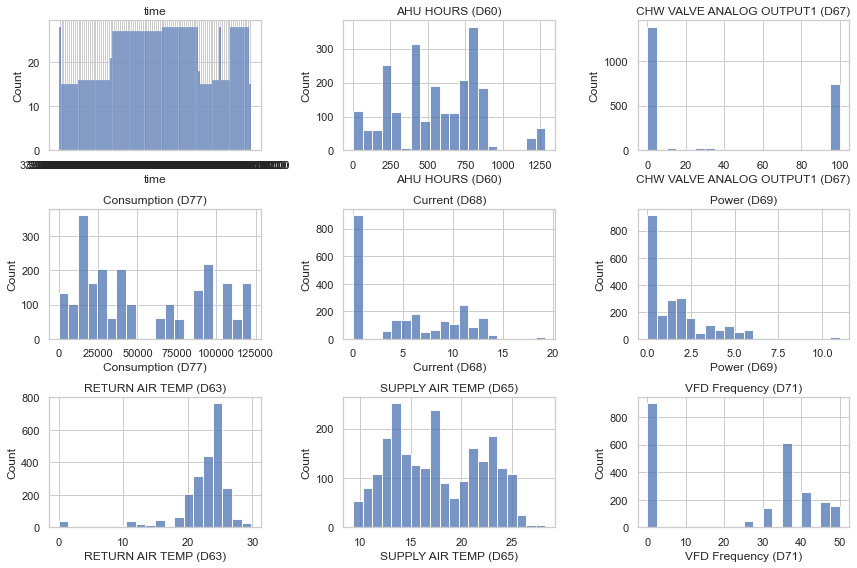

In [152]:
# Check the  Number of categorical and discreate variables  present in the dataset
# So i am using histogram graph to visualize the discrete varaibles 
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)

# Visualize discrete variables
for ax, col in zip(axes.flatten(), data.columns):
    sns.histplot(data=data, x=col, bins=20, ax=ax)
    ax.set_title(col)

# Show the plot
plt.tight_layout()
plt.show()

In [153]:
# handle the missing values 
data.isnull().sum()

time                               0
AHU HOURS (D60)                    0
CHW VALVE ANALOG OUTPUT1 (D67)     0
Consumption (D77)                  0
Current (D68)                      0
Power (D69)                        0
RETURN AIR TEMP (D63)              0
SUPPLY AIR TEMP (D65)              0
VFD Frequency (D71)                0
VFD Speed (D70)                    0
Consumption_difference            28
dtype: int64

So from these I can identify that there is only one attributes (Consumption_difference) in which NULL values are present 

<AxesSubplot:>

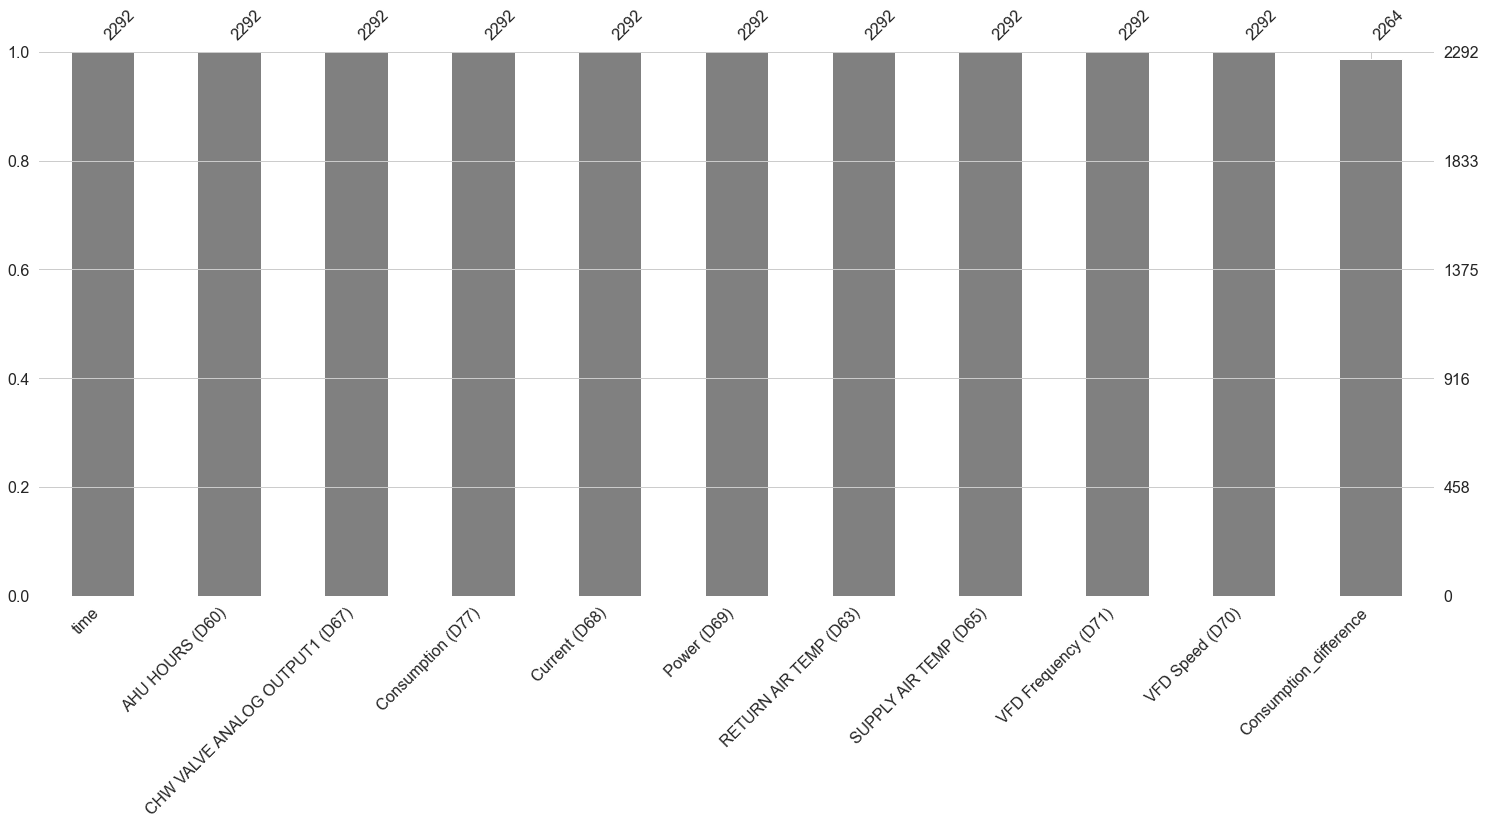

In [154]:
# By using missingno libary we can depict missing values  by visualizing them in graphs , charts etc
msno.bar(data , color = "grey")

Here, we see that in each column we need to have 2292 data values, but in column (Consumption_difference), we have some missing values.

**R2)A filter data frame with all non zero “consumption difference”**

In [256]:
# A filter data frame with all non zero “consumption difference”
# Filtering the data and including only those rows where the 'Consumption_difference' is greater than zero.

filter_data = data[data["Consumption_difference"] !=0]

In [257]:
filter_data


,time,AHU HOURS (D60),CHW VALVE ANALOG OUTPUT1 (D67),Consumption (D77),Current (D68),Power (D69),RETURN AIR TEMP (D63),SUPPLY AIR TEMP (D65),VFD Frequency (D71),VFD Speed (D70),Consumption_difference
0,3/31/2023 17:00,443,0,106737,4.77,1.56,21.1,11.7,40.0,1200,-15483.0
917,3/28/2023 1:00,389,0,8230,0.00,0.00,19.3,15.6,0.0,0,1.0
918,3/28/2023 17:00,390,100,8231,5.08,1.96,21.8,13.6,45.0,1350,1.0
919,3/29/2023 1:00,397,0,8249,0.00,0.00,19.6,17.4,0.0,0,1.0
920,3/31/2023 9:00,397,100,8250,5.55,2.21,23.4,14.1,45.0,1350,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2287,3/29/2023 14:00,815,0,87070,5.77,2.94,21.9,18.7,50.0,1500,NaN
2288,3/29/2023 14:00,815,39,93364,5.95,2.26,23.0,13.4,45.0,1350,NaN
2289,3/29/2023 14:00,258,100,75414,8.95,2.58,24.7,14.9,30.0,900,NaN
2290,3/29/2023 14:00,161,0,95001,4.78,0.86,23.8,19.6,30.0,900,NaN


After eliminating the rows of Consumption_difference containing 0 value, the dataset now comprises 1376 rows and 11 columns.

# Handling missing Values

**R3) handle missing values by dropping them (filter dataset without null values)**

In [157]:
# Handling missing values is a crucial step in data preprocessing, and one common approach is to remove complete rows with missing values.
# Dropping missing values means removing entire rows from the dataset if they contain missing value 

new_data = filter_data.dropna()

In [158]:
new_data

,time,AHU HOURS (D60),CHW VALVE ANALOG OUTPUT1 (D67),Consumption (D77),Current (D68),Power (D69),RETURN AIR TEMP (D63),SUPPLY AIR TEMP (D65),VFD Frequency (D71),VFD Speed (D70),Consumption_difference
0,3/31/2023 17:00,443,0,106737,4.77,1.56,21.1,11.7,40.0,1200,-15483.0
917,3/28/2023 1:00,389,0,8230,0.00,0.00,19.3,15.6,0.0,0,1.0
918,3/28/2023 17:00,390,100,8231,5.08,1.96,21.8,13.6,45.0,1350,1.0
919,3/29/2023 1:00,397,0,8249,0.00,0.00,19.6,17.4,0.0,0,1.0
920,3/31/2023 9:00,397,100,8250,5.55,2.21,23.4,14.1,45.0,1350,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2259,3/31/2023 19:00,414,100,22830,18.19,10.72,24.5,18.5,47.0,1408,11.0
2260,3/30/2023 16:00,407,100,22756,19.19,10.68,26.0,19.8,47.2,1409,13.0
2261,3/31/2023 10:00,859,0,93455,5.49,1.96,22.7,18.6,40.0,1200,18.0
2262,3/31/2023 10:00,421,100,12584,12.22,5.40,24.2,17.5,40.0,1200,51.0


So After applying the dropna() method in Pandas, all the rows that had NaN (missing) values have been removed from the dataset. As a result, the clean dataset now contains 1348 rows and 11 columns. The removal of rows with missing values has led to a more efficient dataset that includes complete and more important information for analysis.

# Handling Outliers

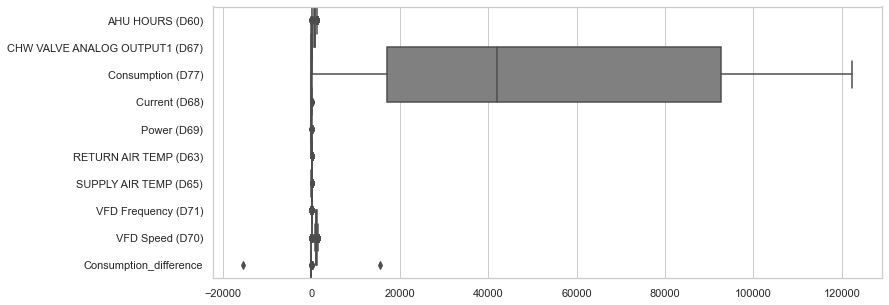

In [159]:
# detecting Outliers using Box Plot 
# Outlier are those data point which has totally different value from rest of the values.
# A box plot is also know as 5 Five Summary is a graphical representation of a dataset's distribution, focusing on the key statistical measures such as (IQR(Q3-Q1) , min , max , medium) to find potential outliers.

sns.set(style="whitegrid") 
plt.figure(figsize=(12,5))  
sns.boxplot(data = new_data  , orient = "h" , width = 2 , color = "grey")
# sns.boxplot(x =data["Consumption_difference"])
plt.show()

By Looking at the Box plot we can justify that  there are two ouliers values  present in  the Consumption_difference column 

In [160]:
outliers_column = new_data["Consumption_difference"]

In [161]:
mean = np.mean(outliers_column )
print("mean :" ,mean)
std= np.std(outliers_column )
print("std :", std)
for  i in outliers_column:
    score = (i-mean)/std
    print(score)
   

# These two Z_score value  are  differ strongly(different properties) from the other data points in Consumption_Difference column so they are consider as outliers 
25.959345447463647
-25.963320534843536


mean : 2.685459940652819
std : 596.444720510953
-25.96332053484289
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825844345153974
-0.002825

-25.963320534843536

In [162]:
# using IQR method to detect outliers values 
# Steps that i had  follow
# 1)First Sort the values of the column 
# 2)Calcuate Q1(25%) and Q3(75%)
# 3)IQR = Q3-Q1
# 4)Then find Low Fence and High Fence to get the outliers point
    
# *****But unfortunately i am not getting the correct values so i tried Z_score method where mean = 0 and standad_deviation = 1

# Used Z_Score 
# outliers=[]
# def detect_outliers(outliers_column):
#     thresold = 20 
#     mean = np.mean(outliers_column)
#     std = np.std(outliers_column)
    
#     for i in outliers_column:
        
#         z_score = (i-mean)/std
#         if (z_score) > thresold:
#             outliers.append(i)
#             return outliers
        
        
outliers = []

def detect_outliers(outliers_column):
    threshold = 20 
    threshold1= -20
    mean = np.mean(outliers_column)
    std = np.std(outliers_column)
    
    for i in outliers_column:
        z_score = (i - mean) / std
        if z_score > threshold or z_score <threshold1:
            outliers.append(i)
    
    return outliers
        

In [163]:
detect_outliers(outliers_column)


[-15483.0, 15486.0]

In [164]:
# Count occurrences of each outlier value
outlier_counts = pd.Series(outliers).value_counts()
outlier_counts

-15483.0    1
 15486.0    1
dtype: int64

In [165]:
# Store the outliers value in the list 
outliers = [15486 , -15483]


In [166]:
# Droping rows containing any of the above outliers value
new_data = new_data[~new_data['Consumption_difference'].isin(outliers)]

In [167]:
new_data

,time,AHU HOURS (D60),CHW VALVE ANALOG OUTPUT1 (D67),Consumption (D77),Current (D68),Power (D69),RETURN AIR TEMP (D63),SUPPLY AIR TEMP (D65),VFD Frequency (D71),VFD Speed (D70),Consumption_difference
917,3/28/2023 1:00,389,0,8230,0.00,0.00,19.3,15.6,0.0,0,1.0
918,3/28/2023 17:00,390,100,8231,5.08,1.96,21.8,13.6,45.0,1350,1.0
919,3/29/2023 1:00,397,0,8249,0.00,0.00,19.6,17.4,0.0,0,1.0
920,3/31/2023 9:00,397,100,8250,5.55,2.21,23.4,14.1,45.0,1350,1.0
921,3/28/2023 0:00,583,0,16920,9.40,1.84,25.5,16.9,35.0,1050,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2258,3/31/2023 18:00,413,100,22819,19.06,10.75,24.8,18.7,47.2,1417,11.0
2259,3/31/2023 19:00,414,100,22830,18.19,10.72,24.5,18.5,47.0,1408,11.0
2260,3/30/2023 16:00,407,100,22756,19.19,10.68,26.0,19.8,47.2,1409,13.0
2261,3/31/2023 10:00,859,0,93455,5.49,1.96,22.7,18.6,40.0,1200,18.0


After removing the outliers from the 'Consumption_difference' column, the dataset now contains 1346 rows and 11 columns.

**R4)Create new column Air_Temperature_Difference by subtracting columns RETURN AIR TEMP (D63) & SUPPLY AIR TEMP (D65)**

In [258]:
# So to create new Column called Air_Temperature_Difference we have to subtract AIR TEMP (D63) & SUPPLY AIR TEMP (D65) columns value
# df['new_column'] 

new_data.loc[:,'Air_Temperature_Difference'] = new_data['RETURN AIR TEMP (D63)'] - new_data['SUPPLY AIR TEMP (D65)']

C:\Users\HP\AppData\Local\Temp\ipykernel_12292\1624028615.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.loc[:,'Air_Temperature_Difference'] = new_data['RETURN AIR TEMP (D63)'] - new_data['SUPPLY AIR TEMP (D65)']


In [259]:
new_data

,time,AHU HOURS (D60),CHW VALVE ANALOG OUTPUT1 (D67),Consumption (D77),Current (D68),Power (D69),RETURN AIR TEMP (D63),SUPPLY AIR TEMP (D65),VFD Frequency (D71),VFD Speed (D70),Consumption_difference,Air_Temperature_Difference
917,2023-03-28 01:00:00,389,0,8230,0.00,0.00,19.3,15.6,0.0,0,1.0,3.7
918,2023-03-28 17:00:00,390,100,8231,5.08,1.96,21.8,13.6,45.0,1350,1.0,8.2
919,2023-03-29 01:00:00,397,0,8249,0.00,0.00,19.6,17.4,0.0,0,1.0,2.2
920,2023-03-31 09:00:00,397,100,8250,5.55,2.21,23.4,14.1,45.0,1350,1.0,9.3
921,2023-03-28 00:00:00,583,0,16920,9.40,1.84,25.5,16.9,35.0,1050,1.0,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...
2258,2023-03-31 18:00:00,413,100,22819,19.06,10.75,24.8,18.7,47.2,1417,11.0,6.1
2259,2023-03-31 19:00:00,414,100,22830,18.19,10.72,24.5,18.5,47.0,1408,11.0,6.0
2260,2023-03-30 16:00:00,407,100,22756,19.19,10.68,26.0,19.8,47.2,1409,13.0,6.2
2261,2023-03-31 10:00:00,859,0,93455,5.49,1.96,22.7,18.6,40.0,1200,18.0,4.1


**R5)Plot a bar chart of consumption difference to understand daily, weekly, and houly
trends and patterns in the data over time (use group by and sum)**

In [260]:
# The  message appears when I am modifying a small part  of a DataFrame that may not be clear to pandas whether it's a view or a copy.
# The warning suggests using .loc[row_indexer, col_indexer] to modify the DataFrame instead of modifying a slice directly.
new_data.loc[:, "time"] = pd.to_datetime(new_data['time'])

C:\Users\HP\AppData\Local\Temp\ipykernel_12292\1062870357.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.loc[:, "time"] = pd.to_datetime(new_data['time'])


In [261]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1346 entries, 917 to 2262
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   time                            1346 non-null   datetime64[ns]
 1   AHU HOURS (D60)                 1346 non-null   int64         
 2   CHW VALVE ANALOG OUTPUT1 (D67)  1346 non-null   int64         
 3   Consumption (D77)               1346 non-null   int64         
 4   Current (D68)                   1346 non-null   float64       
 5   Power (D69)                     1346 non-null   float64       
 6   RETURN AIR TEMP (D63)           1346 non-null   float64       
 7   SUPPLY AIR TEMP (D65)           1346 non-null   float64       
 8   VFD Frequency (D71)             1346 non-null   float64       
 9   VFD Speed (D70)                 1346 non-null   int64         
 10  Consumption_difference          1346 non-null   float64       
 11  Ai

In [172]:
new_data.shape

(1346, 12)

In [173]:
new_data["time"]

917    2023-03-28 01:00:00
918    2023-03-28 17:00:00
919    2023-03-29 01:00:00
920    2023-03-31 09:00:00
921    2023-03-28 00:00:00
               ...        
2258   2023-03-31 18:00:00
2259   2023-03-31 19:00:00
2260   2023-03-30 16:00:00
2261   2023-03-31 10:00:00
2262   2023-03-31 10:00:00
Name: time, Length: 1346, dtype: datetime64[ns]

After converting the datatype of Time Column the values look like these

In [174]:
new_data["Consumption_difference"]

917      1.0
918      1.0
919      1.0
920      1.0
921      1.0
        ... 
2258    11.0
2259    11.0
2260    13.0
2261    18.0
2262    51.0
Name: Consumption_difference, Length: 1346, dtype: float64

In [175]:
# Group by day, week, and hour, and sum the consumption differences
dailytrends = new_data.groupby(new_data['time'].dt.date)['Consumption_difference'].sum()
weeklytrends = new_data.groupby(new_data['time'].dt.week)['Consumption_difference'].sum()
hourlytrends = new_data.groupby(new_data['time'].dt.hour)['Consumption_difference'].sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_12292\2974068050.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  weeklytrends = new_data.groupby(new_data['time'].dt.week)['Consumption_difference'].sum()


In [35]:
# So to resolve the above error i had use isocalendar() as it provides a more consistent and reliable way to get the week number.
# weeklytrends = new_data.groupby(new_data['time'].dt.isocalendar().week)['Consumption_difference'].sum()

In [176]:
dailytrends

time
2023-03-27     101.0
2023-03-28     538.0
2023-03-29     790.0
2023-03-30    1011.0
2023-03-31    1154.0
2023-04-01      23.0
Name: Consumption_difference, dtype: float64

In [177]:
weeklytrends

time
13    3617.0
Name: Consumption_difference, dtype: float64

In [178]:
hourlytrends

time
0     145.0
1      96.0
2      92.0
3      90.0
4      92.0
5      86.0
6      84.0
7      97.0
8     106.0
9     121.0
10    211.0
11    145.0
12    132.0
13    154.0
14    177.0
15    185.0
16    222.0
17    205.0
18    217.0
19    199.0
20    216.0
21    184.0
22    183.0
23    178.0
Name: Consumption_difference, dtype: float64

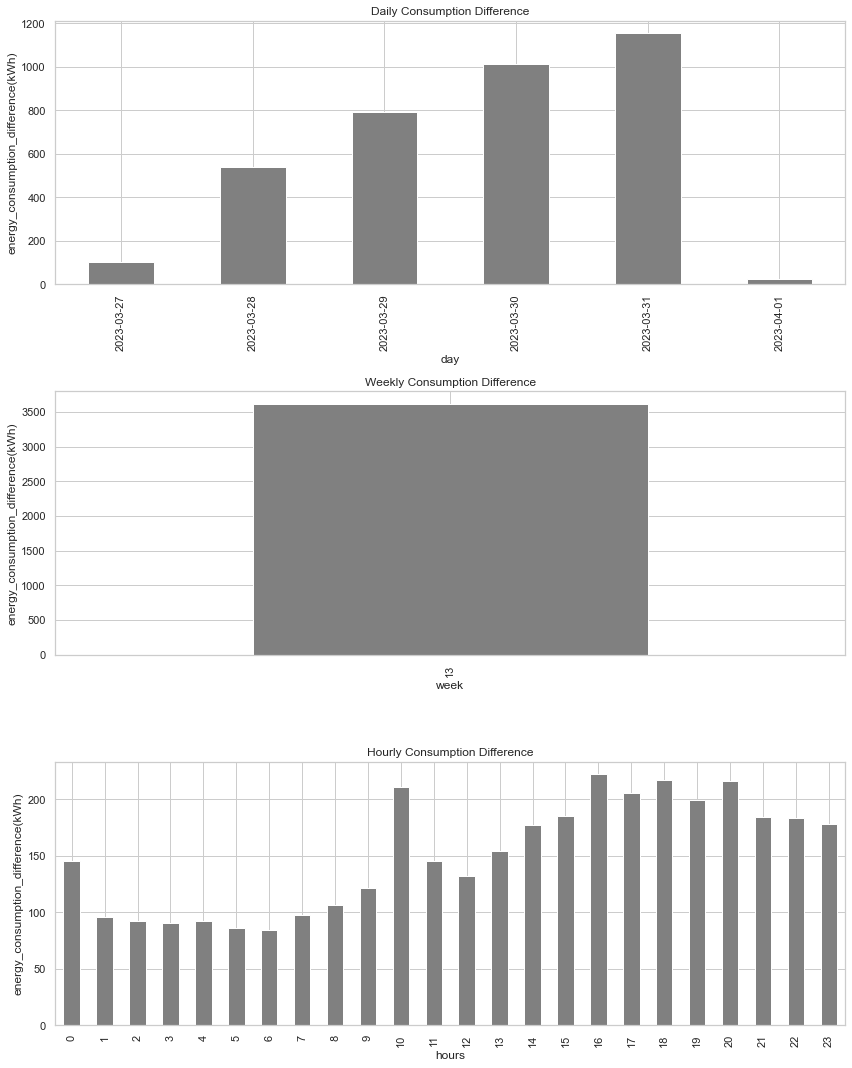

In [179]:
# To draw a bar plot i will use matplolib and seaborn library
plt.figure(figsize=(12, 15))

plt.subplot(3, 1, 1)
dailytrends.plot(kind='bar',xlabel = "day" , ylabel = "energy_consumption_difference(kWh)",  title='Daily Consumption Difference' ,color = "grey")

plt.subplot(3, 1, 2)
weeklytrends.plot(kind='bar', xlabel = "week"  , ylabel= "energy_consumption_difference(kWh)", title='Weekly Consumption Difference' , color = "grey")

plt.subplot(3, 1, 3)
hourlytrends.plot(kind='bar', xlabel = "hours"  , ylabel= "energy_consumption_difference(kWh)" ,title='Hourly Consumption Difference' , color = "grey")

plt.tight_layout()
plt.show()

**R6)Plot pie chart for counts(in percent) of record where Air_Temperature_Difference less than zero and greater than zero**

In [262]:
new_data.shape

(1346, 12)

In [268]:
less_then_zero = (new_data['Air_Temperature_Difference']<0).sum()
greater_then_zero = (new_data['Air_Temperature_Difference']>0).sum()
print(greater_then_zero)
print(less_then_zero)

1292
49


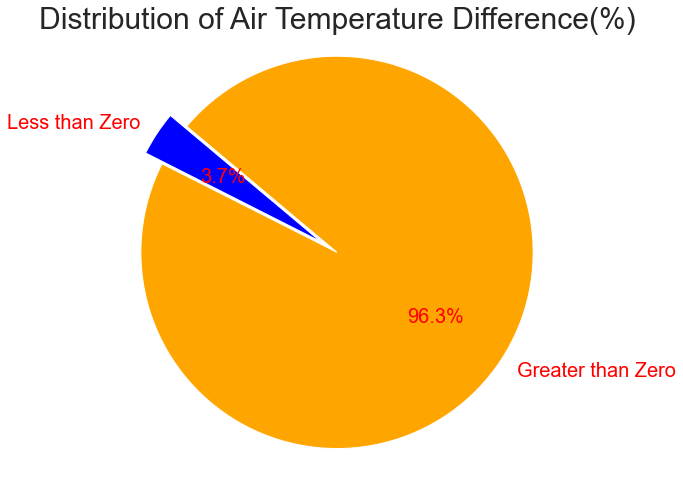

In [269]:
labels = ['Less than Zero', 'Greater than Zero']
sizes = [less_then_zero, greater_then_zero]
colors = ['blue', 'orange']
explode = (0.1, 0)  


#Creating  a pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140 , textprops={'fontsize': 20 ,'color':'red'} ,radius=1)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Distribution of Air Temperature Difference(%)' , size = 30 )
plt.show()



Observation : by looking at the pie chart we can justify that 96.3% Air temperature difference is greater then zero and only 3.7% are less then zero 

**R7)Plot heat map to understand correlations between all the columns and drop the
columns with respect to correlation**

In [184]:
#Correlation is a statistical measure that describes  the relationship between two variables and indicates how they change in relation to each other**

# First i will find the corrleation between different variables 
correlation = new_data.corr()
correlation

,AHU HOURS (D60),CHW VALVE ANALOG OUTPUT1 (D67),Consumption (D77),Current (D68),Power (D69),RETURN AIR TEMP (D63),SUPPLY AIR TEMP (D65),VFD Frequency (D71),VFD Speed (D70),Consumption_difference,Air_Temperature_Difference
AHU HOURS (D60),1.000000,-0.058957,0.275735,-0.236515,-0.253872,-0.012169,-0.226057,-0.050072,-0.050103,-0.226595,0.220821
CHW VALVE ANALOG OUTPUT1 (D67),-0.058957,1.000000,-0.355381,0.399115,0.334841,0.103992,-0.213406,0.276000,0.276028,0.226216,0.270993
Consumption (D77),0.275735,-0.355381,1.000000,-0.329299,-0.106489,-0.349358,-0.000327,-0.020510,-0.020559,-0.090491,-0.188839
Current (D68),-0.236515,0.399115,-0.329299,1.000000,0.776194,0.546740,0.321084,0.378028,0.377876,0.521580,-0.026961
Power (D69),-0.253872,0.334841,-0.106489,0.776194,1.000000,0.177527,0.429678,0.445930,0.445612,0.722805,-0.336124
RETURN AIR TEMP (D63),-0.012169,0.103992,-0.349358,0.546740,0.177527,1.000000,0.280150,0.058412,0.058278,0.085956,0.259647
SUPPLY AIR TEMP (D65),-0.226057,-0.213406,-0.000327,0.321084,0.429678,0.280150,1.000000,-0.018614,-0.018732,0.359315,-0.854293
VFD Frequency (D71),-0.050072,0.276000,-0.020510,0.378028,0.445930,0.058412,-0.018614,1.000000,0.999978,0.231204,0.050354
VFD Speed (D70),-0.050103,0.276028,-0.020559,0.377876,0.445612,0.058278,-0.018732,0.999978,1.000000,0.231248,0.050400
Consumption_difference,-0.226595,0.226216,-0.090491,0.521580,0.722805,0.085956,0.359315,0.231204,0.231248,1.000000,-0.314924


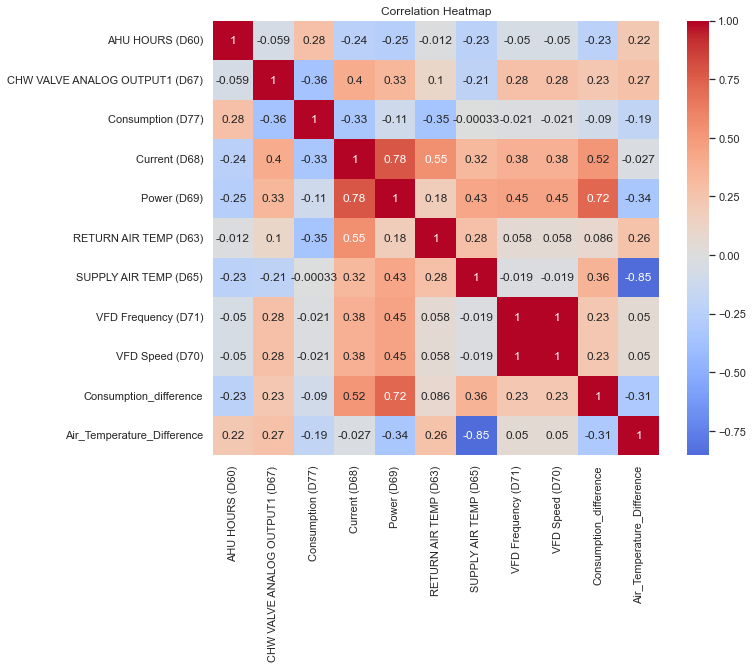

In [185]:
# Ploting Heatmap 
# A heatmap is a graphical representation that uses colors to visualize the numerical values in a matrix. 
# It's commonly used to display correlation matrices, where each cell in the matrix represents the correlation coefficient between two variables.

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


 In the resulting heatmap, each cell's color corresponds to the correlation strength between two variables. You can interpret the heatmap as follows:

Darker colors represent higher correlation values, either positive or negative.
Lighter colors or a lack of color (white or neutral) indicate lower or no correlation.
The diagonal cells (top-left to bottom-right) represent the correlation of a variable with itself, which is always 1.


**observed - So By looking at the heatmap values we can justify that VFA frequency and VFD speed is highly correlate attributes so i decided to drop one of the column from the dataset**

In [270]:
dropped_data=new_data.drop(columns=['VFD Speed (D70)'])

In [271]:
dropped_data.head(5)

,time,AHU HOURS (D60),CHW VALVE ANALOG OUTPUT1 (D67),Consumption (D77),Current (D68),Power (D69),RETURN AIR TEMP (D63),SUPPLY AIR TEMP (D65),VFD Frequency (D71),Consumption_difference,Air_Temperature_Difference
917,2023-03-28 01:00:00,389,0,8230,0.00,0.00,19.3,15.6,0.0,1.0,3.7
918,2023-03-28 17:00:00,390,100,8231,5.08,1.96,21.8,13.6,45.0,1.0,8.2
919,2023-03-29 01:00:00,397,0,8249,0.00,0.00,19.6,17.4,0.0,1.0,2.2
920,2023-03-31 09:00:00,397,100,8250,5.55,2.21,23.4,14.1,45.0,1.0,9.3
921,2023-03-28 00:00:00,583,0,16920,9.40,1.84,25.5,16.9,35.0,1.0,8.6


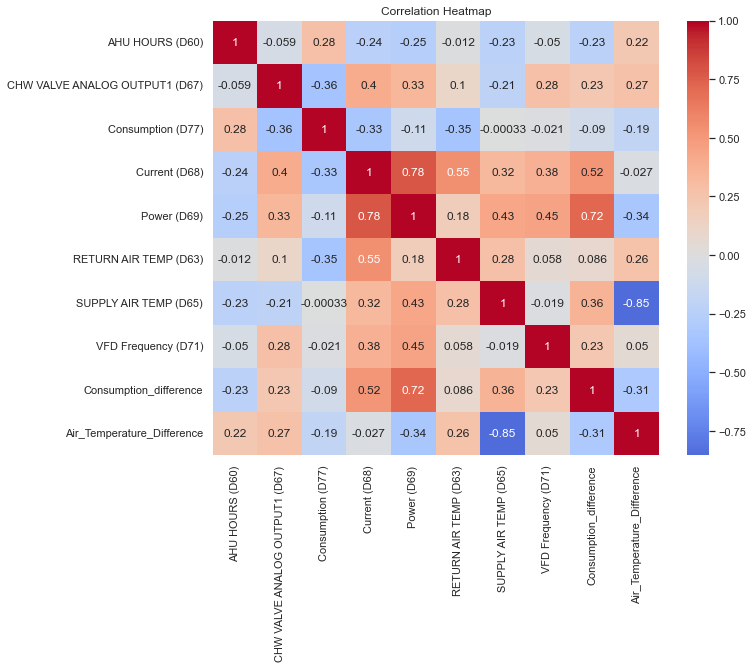

In [47]:
correlation = dropped_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

So Now u can see the difference between both the heapmap figure 

**R8). Do sampling of data with fraction 1**

In [272]:
dropped_data.shape

(1346, 11)

In [273]:
# Using sample method for sampling of data  with fraction 1 means 100 percent 

dropped_data.sample(frac=1)

,time,AHU HOURS (D60),CHW VALVE ANALOG OUTPUT1 (D67),Consumption (D77),Current (D68),Power (D69),RETURN AIR TEMP (D63),SUPPLY AIR TEMP (D65),VFD Frequency (D71),Consumption_difference,Air_Temperature_Difference
1775,2023-03-28 02:00:00,704,0,44138,10.90,2.16,25.0,13.7,35.0,3.0,11.3
1207,2023-03-28 22:00:00,820,100,24566,10.17,1.60,24.5,12.2,35.0,1.0,12.3
926,2023-03-29 12:00:00,619,0,16987,9.43,1.86,28.4,18.3,35.0,1.0,10.1
944,2023-03-28 17:00:00,1204,100,37297,6.45,1.59,25.1,13.5,35.0,1.0,11.6
1208,2023-03-29 00:00:00,822,100,24569,10.29,1.47,24.0,11.7,35.0,1.0,12.3
...,...,...,...,...,...,...,...,...,...,...,...
1937,2023-03-30 19:00:00,580,100,17035,9.16,3.31,25.0,17.3,50.0,4.0,7.7
1437,2023-03-30 22:00:00,772,0,44282,11.09,2.07,25.8,14.0,35.0,2.0,11.8
2072,2023-03-30 16:00:00,491,100,31210,10.55,3.62,25.9,16.5,50.0,5.0,9.4
1738,2023-03-30 19:00:00,844,23,93426,6.44,2.54,23.1,23.3,45.0,2.0,-0.2


In [275]:
dropped_data.shape

(1346, 11)

**R9).Define consumption differences as dependent variable and other as independent
variables, scale down the values with appropriate scaler(minmax/standard),split
data set into train and test**


In [276]:
# Now putting the dependent variable in Y and  all the independent variable in X by exclude the time and consumption difference column 
X = dropped_data.drop(columns=['Consumption_difference' , 'time'])  # Independent features
Y = dropped_data['Consumption_difference']  # Dependent features

In [277]:
X

,AHU HOURS (D60),CHW VALVE ANALOG OUTPUT1 (D67),Consumption (D77),Current (D68),Power (D69),RETURN AIR TEMP (D63),SUPPLY AIR TEMP (D65),VFD Frequency (D71),Air_Temperature_Difference
917,389,0,8230,0.00,0.00,19.3,15.6,0.0,3.7
918,390,100,8231,5.08,1.96,21.8,13.6,45.0,8.2
919,397,0,8249,0.00,0.00,19.6,17.4,0.0,2.2
920,397,100,8250,5.55,2.21,23.4,14.1,45.0,9.3
921,583,0,16920,9.40,1.84,25.5,16.9,35.0,8.6
...,...,...,...,...,...,...,...,...,...
2258,413,100,22819,19.06,10.75,24.8,18.7,47.2,6.1
2259,414,100,22830,18.19,10.72,24.5,18.5,47.0,6.0
2260,407,100,22756,19.19,10.68,26.0,19.8,47.2,6.2
2261,859,0,93455,5.49,1.96,22.7,18.6,40.0,4.1


In [280]:
Y

917      1.0
918      1.0
919      1.0
920      1.0
921      1.0
        ... 
2258    11.0
2259    11.0
2260    13.0
2261    18.0
2262    51.0
Name: Consumption_difference, Length: 1346, dtype: float64

In [281]:
# Split the dataset into training and testing set by using train_test_split method 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)


I will use the x_train and y_train dataset to train the model, and then evaluate its performance by using the x_test and y_test dataset by testing it.

In [282]:
x_train

,AHU HOURS (D60),CHW VALVE ANALOG OUTPUT1 (D67),Consumption (D77),Current (D68),Power (D69),RETURN AIR TEMP (D63),SUPPLY AIR TEMP (D65),VFD Frequency (D71),Air_Temperature_Difference
1278,393,100,8238,5.73,2.56,20.8,13.2,45.0,7.6
1267,164,15,95004,4.79,0.84,24.0,18.3,30.0,5.7
1225,852,100,24612,10.04,1.61,24.3,12.0,35.0,12.3
1342,644,0,17034,9.05,1.84,29.2,18.0,35.0,11.2
1431,765,0,44267,10.99,2.03,27.5,14.7,35.0,12.8
...,...,...,...,...,...,...,...,...,...
2012,500,100,31244,11.27,3.76,23.6,14.9,50.0,8.7
2047,530,100,2460,13.07,4.66,25.4,17.8,35.0,7.6
2211,795,100,114347,13.78,6.08,26.0,16.0,40.0,10.0
1777,720,0,44172,11.11,2.13,27.0,14.9,35.0,12.1


In [283]:
# By using shape method we can see the number of rows and number of column present in each part  of train and test data
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1009, 9)
X_test shape: (337, 9)
y_train shape: (1009,)
y_test shape: (337,)


In [284]:
# Standardizing the datset so that the column values ranges between 0 and 1
# Standarization and Normalization concepts are both concepts that fall under of feature scaling. (you can choose StandardScaler or MinMaxScaler())
# Initialize a scaler 
scaler = StandardScaler() 

In [285]:
#  Scale the features using the scaler 
# The fit_transform method is used to both calculate the scaling parameters (such as mean and standard deviation for standardization) and apply the scaling transformation to the data.
x_train = scaler.fit_transform(x_train)

In [286]:
x_train

array([[-1.36053941,  0.96133352, -1.12154054, ..., -0.67583311,
         0.90837568, -0.3490793 ],
       [-2.38198283, -0.81381976,  1.03660377, ...,  0.87757479,
        -0.90005939, -0.92854067],
       [ 0.68680787,  0.96133352, -0.71426748, ..., -1.04134085,
        -0.2972477 ,  1.08432513],
       ...,
       [ 0.43256213,  0.96133352,  1.51772523, ...,  0.17701828,
         0.30556399,  0.3828719 ],
       [ 0.09802826, -1.1270821 , -0.22774853, ..., -0.15803048,
        -0.2972477 ,  1.02332919],
       [-0.81636432,  0.96133352, -1.26702363, ...,  0.2988542 ,
        -0.2972477 , -0.37957727]])

In [287]:
# The transform method is used to apply a previously learned scaling transformation to new data.
x_test = scaler.transform(x_test)

In [288]:
x_test

array([[-0.44614683,  0.96133352, -0.90111463, ...,  0.81665683,
         1.51118737, -0.47107117],
       [-0.58442083,  0.96133352, -1.26080535, ...,  0.45114909,
        -0.2972477 , -0.50156913],
       [ 0.66450561, -1.1270821 ,  0.84075253, ...,  0.572985  ,
        -0.90005939, -1.2640183 ],
       ...,
       [-0.12499432, -1.1270821 , -0.90156234, ...,  1.39537742,
        -0.2972477 ,  0.291378  ],
       [ 0.490548  , -1.1270821 ,  1.51961559, ...,  2.85740838,
         0.30556399, -2.78891663],
       [-1.39622302,  0.96133352, -1.01851593, ...,  0.69482092,
         0.30556399, -0.56256507]])

# Using Simple Linear Regression 

In [289]:
#  create the instance of the LinearRegression model
reg = LinearRegression()

In [290]:
# fit the model to the training data 
reg.fit(x_train, y_train)

LinearRegression()

In [291]:
predictions_data = reg.predict(x_test)

In [300]:
predictions_data

array([ 3.61435507,  4.9119438 ,  0.92084545,  1.80959295,  1.23824725,
        4.92707553,  3.76488336,  2.7357223 ,  2.4451588 ,  1.57765991,
        2.30490159,  4.94387207,  3.04960961,  3.71046592,  2.5379475 ,
        1.60631237,  2.55974534,  1.76168945,  1.53836751,  1.83182935,
        1.58581504,  1.5661823 ,  2.37517652,  2.22178053,  1.91412925,
        1.0992861 ,  1.69542761,  5.84375698,  3.62294204,  1.04846844,
        1.52099461,  1.50319873,  0.97377772,  1.89845677,  1.40953535,
        3.87854949,  1.42056643,  2.91579086,  1.81183667,  2.49639823,
        2.5527573 ,  1.59191605,  1.66514326,  1.9158891 ,  4.88063242,
        1.61619218,  1.2833623 ,  1.60076862,  1.09052475,  1.87199778,
        2.48268084,  2.49553496,  1.82343832,  2.17710197,  3.12209221,
        1.25635604,  2.08441399,  2.53069656,  5.61364888,  5.82606263,
        1.40870649,  1.86400095,  2.05787847,  1.91108051,  0.92407137,
        1.07166296,  3.51397653,  4.93707981,  3.66858134,  1.16

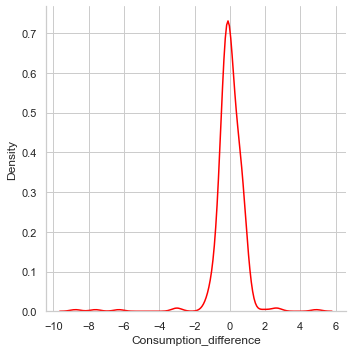

In [301]:
# To validate our predicted value i had visualize the predicted data and y_test data on distanc plot 
sns.displot(predictions_data-y_test,kind = "kde" , color = "red")

**By analyzing the graph, we can see the difference between the predicted and actual values is minimal, showcasing a low variance. All data points are confined within a narrow range of -2.5 to +2.5, indicating a high degree of accuracy. Additionally, the absence of  outliers further strengthens the reliability of the model's predictions.**

In [302]:
# Evaluating the model by using mean absolute percentage error metrics
# Mean absolute percentage error is a relative error measure that uses absolute values to keep the positive and negative errors from canceling one another out and uses relative errors to enable you to compare forecast accuracy between time-series models.
accuracy_percent = mean_absolute_percentage_error(y_test,predictions_data)
print(accuracy_percent)

0.23423176162383602


**A MAPE value that we got  is a relatively low value , and in  case, a lower MAPE indicates better accuracy of the model's prediction**

In [306]:
# using another metric called r2 score 
from sklearn.metrics import r2_score


In [307]:
score = r2_score(predictions_data , y_test)

In [308]:
score


0.5822572781593546

# Using Ridge Regression(L2 Regulations  )

Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated.And Above we had seen by using heatmap that independent variable are highly correlated.
Also know as Tikhonov regularization.
**We mainly use Ridge Regression to handle the overfitting condition(error rate of training data almost become zero) by adding additional parameter(penalty) Lamda(slope)2 in the cost function to improve the generalization performance of the model**

In [ ]:
# In ridge regression we will do hyperparameter tuninng of lamda to select perfect parameter(called alpha in sklearn) by using GridSearchCV
# GridSearchCV is a technique used in machine learning for hyperparameter tuning and model selection. GridSearchCV stands for "Grid Search Cross-Validation."


In [208]:
# Initializing the object of Regressor
ridge_regression = Ridge()


In [209]:
ridge_regression

Ridge()

In [217]:
# In ridge the default first paramete is alpha . To see which value of alpha is suitable for the probelm statement we take list of alpha values
# To determine the optimal alpha value for ridge regularization, we can perform cross-validation and select the alpha value that minimizes the mean squared error.

parameters ={"alpha":[1,2,5,6,10,20,30,40,50,60,70,80,90]}
# Now i will cross validating by using gridsearchcv

ridgecv = GridSearchCV(ridge_regression , parameters , scoring="neg_mean_absolute_percentage_error" , cv = 5)
ridgecv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 6, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_absolute_percentage_error')

In [220]:
# Based on my problem statment the best alpha that i got is 1
print(ridgecv.best_params_)

{'alpha': 1}


In [223]:
print(ridgecv.best_score_)

-0.22572547298017534


In [309]:
ridge_pred = ridgecv.predict(x_test)

In [310]:
ridge_pred

array([ 3.61621308,  4.91101872,  0.92354225,  1.8105796 ,  1.24513456,
        4.9238791 ,  3.76593291,  2.73607504,  2.44565741,  1.58247491,
        2.3077818 ,  4.94319458,  3.04835244,  3.71203783,  2.53687878,
        1.6050747 ,  2.56206527,  1.75802722,  1.53699413,  1.83034633,
        1.59081072,  1.56398988,  2.37912164,  2.21848558,  1.91743544,
        1.10070425,  1.69959382,  5.84429771,  3.62498036,  1.0564941 ,
        1.51739282,  1.5090745 ,  0.97084848,  1.89896204,  1.4159407 ,
        3.87990614,  1.42492622,  2.91424594,  1.81279958,  2.49887095,
        2.55793832,  1.5898598 ,  1.66209989,  1.91660327,  4.87899884,
        1.6141436 ,  1.2900558 ,  1.59908226,  1.10196783,  1.87456014,
        2.48264849,  2.50083926,  1.82920314,  2.17437085,  3.12039313,
        1.25329269,  2.0861784 ,  2.53084605,  5.61046702,  5.82626029,
        1.41285002,  1.86346588,  2.06095072,  1.91312471,  0.9214329 ,
        1.07279414,  3.5164192 ,  4.93628083,  3.6697487 ,  1.15

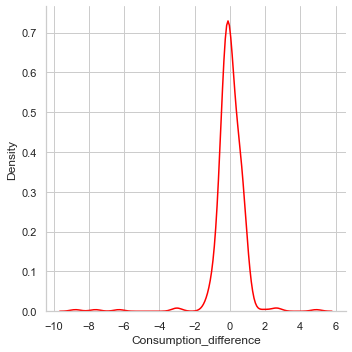

In [311]:
sns.displot(ridge_pred-y_test,kind = "kde" , color = "red")

In these graph also , we can see the difference between the predicted and actual values is minimal, showcasing a low variance. All data points are confined within a narrow range of -2 to +2, indicating a high degree of accuracy.So we can say that our model is performing well 

In [312]:
# Evaluating the model by using mean absolute percentage error metrics
accuracy_percent = mean_absolute_percentage_error(y_test,ridge_pred)
print(accuracy_percent)


0.23476854057370514


In ridge Regression , we can see the value of MAPE metric  is almost same as Linear Regression MAPE value

In [313]:
# R squared adjusted 
score = r2_score(ridge_pred, y_test)

In [314]:
score

0.5812122544953926

# Using Lasso Regression (L1 Regularization)


Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” (lamda * mod of slope(absolute_value) of coefficient as penalty term to the loss function.

The key feature of Lasso is that it  shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.

In [315]:
from sklearn.linear_model import Lasso

In [316]:
lasso = Lasso()

In [317]:
parameters ={"alpha":[1,2,5,6,10,20,30,40,50,60,70,80,90]}
# Now i will cross validating by using gridsearchcv

lassocv = GridSearchCV(lasso , parameters , scoring="neg_mean_absolute_percentage_error" , cv = 5)
lassocv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 6, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_absolute_percentage_error')

In [318]:
print(lassocv.best_params_)

{'alpha': 1}


In [319]:
print(lassocv.best_score_)

-0.4767069025756439


In [320]:
lasso_pred = lassocv.predict(x_test)

In [321]:
lasso_pred

array([3.13233244, 3.53464784, 1.88594353, 2.33559016, 2.16993088,
       3.56225772, 3.199385  , 2.63141031, 2.6077447 , 2.06737989,
       2.54069213, 3.54253638, 2.91145339, 3.17177512, 2.68268581,
       2.30403601, 2.65113166, 2.33164589, 2.28431467, 2.406587  ,
       2.07132416, 2.30403601, 2.54858067, 2.50124945, 2.50519372,
       2.08315697, 2.35925577, 3.97246167, 3.13233244, 2.09498977,
       2.29220321, 2.00821586, 2.04765855, 2.41841981, 2.23698345,
       3.30193599, 2.00821586, 2.70635142, 2.38686566, 2.6077447 ,
       2.58407909, 2.30798028, 2.28825894, 2.41841981, 3.53070357,
       2.31192455, 2.18965222, 2.30009174, 2.11471112, 2.39080992,
       2.62746605, 2.56830202, 2.44208542, 2.48547237, 2.93906327,
       2.05949135, 2.57224628, 2.67874154, 3.81863519, 3.9685174 ,
       2.00821586, 2.41841981, 2.5446364 , 2.37503285, 2.02793721,
       2.07132416, 3.08894548, 3.54648065, 3.15205378, 1.68084156,
       2.33164589, 3.56225772, 3.10472256, 2.48941664, 2.30403

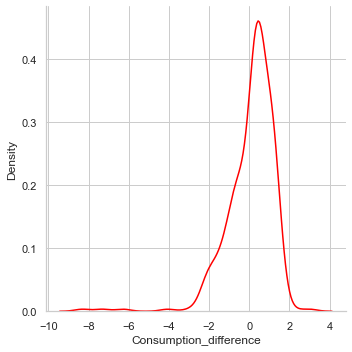

In [322]:
sns.displot(lasso_pred-y_test,kind = "kde" , color = "red")

**In these graph , we can see the difference between the predicted and actual values is minimal, showcasing a low variance. All data points are confined within a narrow range of -4 to +4, indicating a high degree of accuracy. Additionally, the absence of  outliers further strengthens the reliability of the model's predictions.**

In [324]:
# Evaluating the model by using mean absolute percentage error metrics
accuracy_percent = mean_absolute_percentage_error(y_test,lasso_pred)
print(accuracy_percent)


0.46545019539432114


In [325]:
# R squared adjusted 
score = r2_score(lasso_pred, y_test)

In [326]:
score

-2.9413550536049637

 I am getting the negative r2 value that means the performace of the model by using Lasso Regression is not good